<a href="https://colab.research.google.com/github/ywang1110/NLP/blob/main/Quora_Question_Pairs_Similarity_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://miro.medium.com/max/1440/1*YulfXLgM6rhCtaJHDgPPtQ.png"
 height="200"/>


#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

#Import the data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
train_set = pd.read_csv('/content/gdrive/My Drive/NLP project/data/train.csv')[0:120000]
test_set = pd.read_csv('/content/gdrive/My Drive/NLP project/data/test.csv')[0:30000]

In [ ]:
train_set.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
38409,38409,38687,69763,What are some things new employees should know...,What are some things new employees should know...,0
69255,69255,119523,119524,What are the best books on Zen Buddhism?,Which are the best books on Zen Buddhism?,1
97275,97275,161873,158902,How can we get a credit card?,Why cant I get a credit card with no credit?,0
88746,88746,149216,149217,What are the steps to create a website?,What are the steps to follow for building my w...,1
58515,58515,10433,14221,Can I make money online?,How can one make money online?,1


In [ ]:
test_set.sample(5)

,test_id,question1,question2
25075,25075,How effective instant Duolingo in learning a l...,What is the are best app for learning Latin (I...
12025,12025,How can I improve my listening skill quora lea...,Where can listening skill when learn a foreign...
12524,12524,How can we produce electricity programming pla...,How is doesn't produced?
5568,5568,What is the difference porn prolactin and oxyt...,When is serum-prolactin big high?
10759,10759,After missing the CSE 2017 coaching by 4 month...,What should be my strategy for CSE heaven if m...


In [ ]:
train_questions1 = train_set['question1'].tolist()
train_questions2 = train_set['question2'].tolist()
test_questions1 = test_set['question1'].tolist()
test_questions2 = test_set['question2'].tolist()

In [ ]:
questions = train_questions1 + train_questions2 + test_questions1 + test_questions2
questions = list(map(str, questions)) # map -> iterator 
len(questions)

300000

## Tweets (3 classes)

In [ ]:
tweets = pd.read_csv('/content/gdrive/My Drive/NLP project/Tweets.csv')

#Tokenization

# common regex patterns: 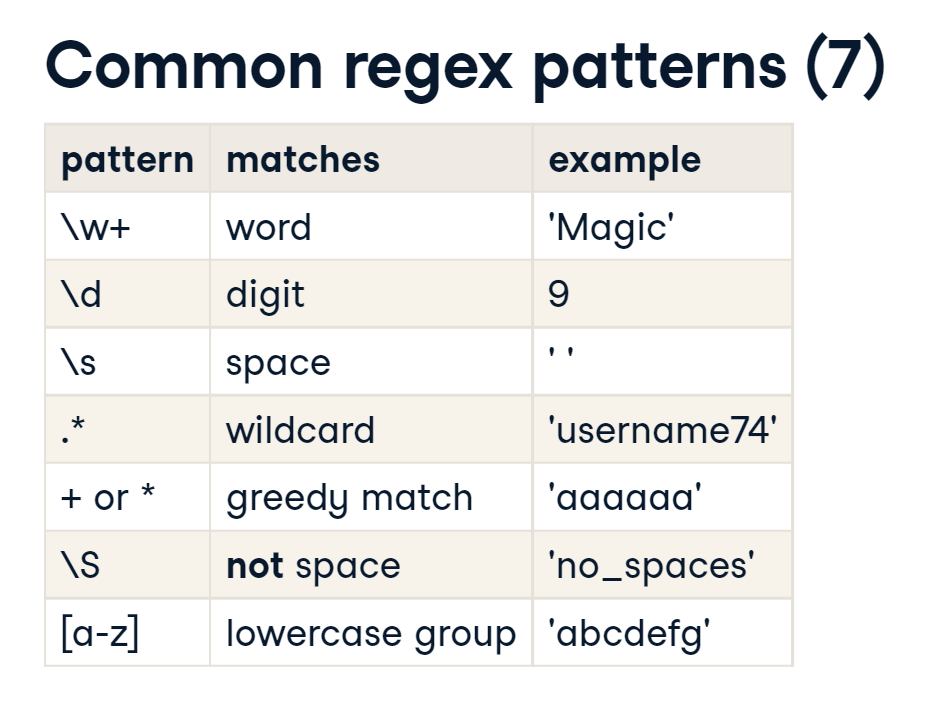

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+') # only words

In [ ]:
sentences = []
for p in tqdm.tqdm(questions):
  sentences.append(tokenizer.tokenize(str(p)))

100%|██████████| 300000/300000 [00:02<00:00, 128365.85it/s]


In [ ]:
print(questions[0:2])
print(sentences[0:2])

['What is the step by step guide to invest in share market in india?', 'What is the story of Kohinoor (Koh-i-Noor) Diamond?']
[['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', 'Koh', 'i', 'Noor', 'Diamond']]


In [ ]:
def get_words(input_sentences):
  output_sentences = []
  for p in input_sentences:
    output_sentences.append(tokenizer.tokenize(str(p)))
  return output_sentences

In [ ]:
train_questions1_words = get_words(train_questions1)
train_questions2_words = get_words(train_questions2)
test_questions1_words = get_words(test_questions1)
test_questions2_words = get_words(test_questions2)

##TF-IDF (Term Frequency — Inverse Document Frequency)
Compute a weight to each word which signifies the importanace of the word in the document and corpus. <br/>
TF-IDF = Term Frequency (TF)*Inverse Document Frequency (IDF)
**output** weight(scalar)
---
*  **Term frequency (TF)**: frequency of a word in a document (highly depends on the length of the document and the generality of word) <br/> TF is individually to each document and word<br/> ***tf(t,d) = count of t in d / number of words in d***


*  Why not just use TF?<br/>
1. common words, as well as stop-words (e.g. is am are) will have very high values and give those words a very high importance
2. 

---
*  **Document Frequency:** the number of documents in which the word is present.We consider one occurrence if the term consists in the document at least once, we do not need to know the number of times the term is present.<br/> ***df(t) = occurrence of t in documents***
---
**Inverse Document Frequency**
idf(t) = N/df


*   Large corpus -> IDF explodes <br/>idf(t) = log(N/df)
*   word which is not in vocab <br/>df=0 -> idf(t)=log(N/(df+1))


---
*  t-term (word)
*  d-document(set of words)
*  N-count of corpus
*  corpus-the total document set

**Basis version of IF-IDF score:**<br/>
tf-idf(t,d) = tf(t,d)*log(N/(df+1))




https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

In [ ]:
from gensim import corpora
from gensim.models import TfidfModel

In [ ]:
dictionary = corpora.Dictionary(sentences)  # Create a mapping with an ids for each token.
new_corpus = [dictionary.doc2bow(txt) for txt in sentences] # Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.

In [ ]:
tfidf=TfidfModel(new_corpus) # implements functionality related to the TF-IDF              # fit model

In [ ]:
tfidf[dictionary.doc2bow(['what', 'is', 'this'])] # (token_id, token_count) 

[(6, 0.2407849128206825), (62, 0.6570005267016968), (899, 0.7144039009353386)]

In [ ]:
def get_sentences_tfidfs(input_sentences):
  output_vectors = []
  for p in input_sentences:
    result = tfidf[dictionary.doc2bow(p)]
    output_vectors.append(result)
  return output_vectors

In [ ]:
train_questions1_tfidfs = get_sentences_tfidfs(train_questions1_words)
train_questions2_tfidfs = get_sentences_tfidfs(train_questions2_words)
test_questions1_tfidfs = get_sentences_tfidfs(test_questions1_words)
test_questions2_tfidfs = get_sentences_tfidfs(test_questions2_words)

In [ ]:
print(train_questions2_words[1])
print(train_questions2_tfidfs[1])

['What', 'would', 'happen', 'if', 'the', 'Indian', 'government', 'stole', 'the', 'Kohinoor', 'Koh', 'i', 'Noor', 'diamond', 'back']
[(0, 0.03689174260974629), (10, 0.07414068369213528), (13, 0.407445916466027), (14, 0.3949851825339399), (15, 0.426363561046035), (16, 0.21677330542161743), (129, 0.13776037832366533), (216, 0.20673749251608306), (256, 0.19268540207594384), (458, 0.16456260111687418), (584, 0.1273697522946146), (905, 0.1904640344823664), (4950, 0.39004005192886004), (9772, 0.3343388492302425)]


In [ ]:
dictionary[1]

'by'

#Word2Vec
The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling
* Skip-gram: word -> words in a window
* CBOW: words (windows) -> word   <br/>

output: vector/embedding of words

In [ ]:
from gensim.models import Word2Vec

In [ ]:
word2vec = Word2Vec(sentences=sentences, size=100, window=8, iter=10, min_count=1)   # the length of the vector to represent each token (word)
# window: the maximum distance between a target word and words around the target word
# min_count: words with an occurance less than this count will be ignored
# workers: the number of threads to use while using (default=3)

In [ ]:
word2vec.wv.vocab  # dictionary

{'What': <gensim.models.keyedvectors.Vocab at 0x7f0090e93710>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f0090e6ef50>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f0090e6ef10>,
 'step': <gensim.models.keyedvectors.Vocab at 0x7f0090e98b10>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f0090e98f90>,
 'guide': <gensim.models.keyedvectors.Vocab at 0x7f0090e98a90>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f0090e98dd0>,
 'invest': <gensim.models.keyedvectors.Vocab at 0x7f0090e98c50>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7f0090e98bd0>,
 'share': <gensim.models.keyedvectors.Vocab at 0x7f0090e98ed0>,
 'market': <gensim.models.keyedvectors.Vocab at 0x7f0090e98f10>,
 'india': <gensim.models.keyedvectors.Vocab at 0x7f0090e98fd0>,
 'story': <gensim.models.keyedvectors.Vocab at 0x7f0090e98d10>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f0090e98b90>,
 'Kohinoor': <gensim.models.keyedvectors.Vocab at 0x7f0090e98cd0>,
 'Koh': <gensim.models.keyedvectors.Vocab at 0x7f0090e

In [ ]:
list(word2vec.wv.vocab)  # the learned vocabulary of tokens(words)

['What',
 'is',
 'the',
 'step',
 'by',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'india',
 'story',
 'of',
 'Kohinoor',
 'Koh',
 'i',
 'Noor',
 'Diamond',
 'How',
 'can',
 'I',
 'increase',
 'speed',
 'my',
 'internet',
 'connection',
 'while',
 'using',
 'a',
 'VPN',
 'Why',
 'am',
 'mentally',
 'very',
 'lonely',
 'solve',
 'it',
 'Which',
 'one',
 'dissolve',
 'water',
 'quikly',
 'sugar',
 'salt',
 'methane',
 'and',
 'carbon',
 'di',
 'oxide',
 'Astrology',
 'Capricorn',
 'Sun',
 'Cap',
 'moon',
 'cap',
 'rising',
 'what',
 'does',
 'that',
 'say',
 'about',
 'me',
 'Should',
 'buy',
 'tiago',
 'be',
 'good',
 'geologist',
 'When',
 'do',
 'you',
 'use',
 'シ',
 'instead',
 'し',
 'Motorola',
 'company',
 'Can',
 'hack',
 'Charter',
 'Motorolla',
 'DCX3400',
 'Method',
 'find',
 'separation',
 'slits',
 'fresnel',
 'biprism',
 'read',
 'YouTube',
 'comments',
 'make',
 'Physics',
 'easy',
 'learn',
 'was',
 'your',
 'first',
 'sexual',
 'experience',
 'like',
 'are',

In [ ]:
# review the embedded vector for a specific token 
word2vec['man']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.2857212 , -0.1937575 , -1.3282404 ,  0.7712813 , -1.8846442 ,
        3.9488397 ,  2.5223277 , -1.512474  , -0.82925   ,  1.1109061 ,
       -0.9007339 ,  0.35382256,  0.08578349,  2.651343  ,  0.34961402,
       -1.4881266 , -4.167208  ,  3.6550868 , -0.8822159 ,  3.4079218 ,
       -4.318846  , -0.55722076, -1.956381  ,  1.1137856 ,  1.2673331 ,
       -1.6030421 , -1.4222671 ,  3.675603  , -0.67119473,  1.2911329 ,
       -1.0560988 ,  3.6769986 ,  1.9457251 , -0.54860073,  1.178653  ,
       -0.6234843 , -1.9691608 ,  2.51411   , -0.73014534, -1.8641015 ,
       -0.7612201 ,  1.4446759 ,  1.3756363 ,  3.6467366 , -2.0293062 ,
        0.29430765, -2.1420197 ,  1.0409573 ,  1.3647398 , -0.7328094 ,
        1.8510062 ,  1.0220728 , -0.6725046 , -1.0473168 ,  2.5267978 ,
       -1.8741693 , -1.0453682 , -1.6918595 ,  0.53586644, -4.498769  ,
       -0.18914916,  3.0826845 , -0.15657263,  2.3079035 ,  0.24031585,
       -0.15390414, -1.0524471 , -0.37167457, -1.7786524 , -3.42

In [ ]:
word2vec.wv.similarity('person', 'man')

0.71966386

In [ ]:
word2vec.wv.vocab['man'].count

1078

In [ ]:
len(word2vec.wv.vocab)

71020

##Train Word2Vector/GloVe
* based on **our own word vector**
 - Pros: 
 - Cons: time-consuming, demanding for computer

* **Pre-trained word embedding (e.g. twitter.27B)** 
 - Pros: 
 - Cons:


##Load pretrained word embedding (Stanford's GloVe Embedding)

- GloVe (Global Vectors for Word Representation)
- a file containing tokens+word vectors
- download the model first, such as `glove.6B.100d.txt` from https://nlp.stanford.edu/projects/glove/   (100d -> 100-d)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
glove_vector_path = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt'

###Convert GloVe vectors to word2vector

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_input_file = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt'
glove_output_file = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt.word2vec'
_ = glove2word2vec(glove_input_file, glove_output_file)

###Load GloVe Vector

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
# load the GloVe model

filename = '/content/gdrive/My Drive/NLP project/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary = False) # Note that the converted file is ASCII format, not binary, so we set binary=False when loading

In [ ]:
glove_model.wv.similarity('person', 'man')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.7526816

In [ ]:
glove_model.wv['man']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 3.7293e-01,  3.8503e-01,  7.1086e-01, -6.5911e-01, -1.0128e-03,
        9.2715e-01,  2.7615e-01, -5.6203e-02, -2.4294e-01,  2.4632e-01,
       -1.8449e-01,  3.1398e-01,  4.8983e-01,  9.2560e-02,  3.2958e-01,
        1.5056e-01,  5.7317e-01, -1.8529e-01, -5.2277e-01,  4.6191e-01,
        9.2038e-01,  3.1001e-02, -1.6246e-01, -4.0567e-01,  7.8621e-01,
        5.7722e-01, -5.3501e-01, -6.8228e-01,  1.6987e-01,  3.6310e-01,
       -7.1773e-02,  4.7233e-01,  2.7806e-02, -1.4951e-01,  1.7543e-01,
       -3.7573e-01, -7.8517e-01,  5.8171e-01,  8.6859e-01,  3.1445e-02,
       -4.5897e-01, -4.0917e-02,  9.5897e-01, -1.6975e-01,  1.3045e-01,
        2.7434e-01, -6.9485e-02,  2.2402e-02,  2.4977e-01, -2.1536e-01,
       -3.2406e-01, -3.9867e-01,  6.8613e-01,  1.7923e+00, -3.7848e-01,
       -2.2477e+00, -7.7025e-01,  4.6582e-01,  1.2411e+00,  5.7756e-01,
        4.1151e-01,  8.4328e-01, -5.4259e-01, -1.6715e-01,  7.3927e-01,
       -9.3477e-02,  9.0278e-01,  5.0889e-01, -5.0031e-01,  2.64

##Word vectors --> Sentence Vectors

1. Merge: Max, Average, '[w1, w2, w3, ...., wn]'  <br/>*e.g. w1 100-d vector*
2. TF-IDF: weighted sum
3. Deep learning: embedding, '[f1, f2, ..., fn]' (LSTM, GRU, Attention) <br/> f---> feature<br/>
    - Last output: fn as 
    - Hidden Vector (LSTM, GRU), hn
    - Attention: '[aw1, aw2, ... , awn]' (attention weights), weighted sum -> sentence vector

4. Doc2Vec: sentence ---> embedding (BERT sentence embedding)


#Construct TF-IDF & Word2Vactor Feasure

In [ ]:
train_questions1_tfidfs[0]  # (dict_id, weight)

[(0, 0.04647779709270368),
 (1, 0.1822570720039786),
 (2, 0.3795121200789133),
 (3, 0.14339205961233994),
 (4, 0.2743635788477922),
 (5, 0.2887230565095903),
 (6, 0.0641007660924909),
 (7, 0.27256152978155446),
 (8, 0.30337312129044286),
 (9, 0.6810270327800437),
 (10, 0.046702804058475544),
 (11, 0.07058432928597289)]

In [ ]:
dictionary[2]

'guide'

In [ ]:
word2vec.wv['by'].shape

(100,)

In [ ]:
y=train_questions1_tfidfs[0] 
y[0]

(0, 0.04647779709270368)

In [ ]:
def get_features(input_sentences, sentence_tfidfs, word2vec, dictionary):
    output_features = []
    for p, tf_idf in zip(input_sentences, sentence_tfidfs):
        sentence_features = [word2vec.wv[dictionary[x[0]]]*x[1] for x in tf_idf]
        output_features.append(np.array(sentence_features).sum(0))
    return output_features

In [ ]:
train_questions1_features = get_features(train_questions1, train_questions1_tfidfs, word2vec, dictionary)
train_questions2_features = get_features(train_questions2, train_questions2_tfidfs, word2vec, dictionary)
test_question1_features = get_features(test_questions1_words, test_questions1_tfidfs, word2vec, dictionary)
test_question2_features = get_features(test_questions2_words, test_questions2_tfidfs, word2vec, dictionary)

In [ ]:
len(train_questions1_tfidfs)

120000

In [ ]:
train_questions1_features[10].shape

(100,)

##Train and Test data preparation

*  **conact**  100-d vectors(2) ->  200-d vector (1)
*  **product** 100-d vectors(2) ->  200-d vector (1)  

cosine = **x*y**/(|x|*|y|)

In [ ]:
def fuse_question1_question2_by_concat(question1, question2):
  fused_results = []
  for q1, q2 in zip(question1, question2):
    f = np.zeros(200)
    f[0:100] = q1
    f[100:200] = q2
    fused_results.append(f)
  return np.array(fused_results)

In [ ]:
train_features = fuse_question1_question2_by_concat(train_questions1_features, train_questions2_features) 
test_features = fuse_question1_question2_by_concat(test_question1_features, test_question2_features)

In [ ]:
train_features.shape

(120000, 200)

In [ ]:
train_labels = train_set['is_duplicate']
train_labels

0         0
1         0
2         0
3         0
4         0
         ..
119995    0
119996    0
119997    0
119998    1
119999    0
Name: is_duplicate, Length: 120000, dtype: int64

# Train and Test

##XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
params = {
    'booster':'gbtree',    # gbtree or gblinear
    'objective':'binary:logistic', # onjective: specify the learning task and corresponding learning objective, users can pass a self-defined function to it. | 'binary:logstic' output probability 
    'eval_metric':'logloss',  
    'max_depth':10, # default=6
    'lambda':1,    # L2 regularization term on weihghts, default=0
    'subsample':0.75, # 0.75 means that xgboost only randomly collected 75% of the training data instance to grow the tree and this will prevent overfitting
    'colsample_bytree':0.75,  # 0.75 means that only 75% columns are collected when constructing each tree 
    'eta':0.2,  # eta controls the learning rate 
    'seed':0,  # 
    'nthread':8
}

In [ ]:
dtrain = xgb.DMatrix(train_features, label=train_labels)

In [ ]:
watch_list = [(dtrain, 'dtrain')]
bst = xgb.train(params, dtrain, num_boost_round=50, evals=watch_list)

[0]	dtrain-logloss:0.644023
[1]	dtrain-logloss:0.605485
[2]	dtrain-logloss:0.575896
[3]	dtrain-logloss:0.552403
[4]	dtrain-logloss:0.531758
[5]	dtrain-logloss:0.514256
[6]	dtrain-logloss:0.499124
[7]	dtrain-logloss:0.485045
[8]	dtrain-logloss:0.472061
[9]	dtrain-logloss:0.462302
[10]	dtrain-logloss:0.452568
[11]	dtrain-logloss:0.44342
[12]	dtrain-logloss:0.435001
[13]	dtrain-logloss:0.425535
[14]	dtrain-logloss:0.417571
[15]	dtrain-logloss:0.410401
[16]	dtrain-logloss:0.403174
[17]	dtrain-logloss:0.3968
[18]	dtrain-logloss:0.389993
[19]	dtrain-logloss:0.384057
[20]	dtrain-logloss:0.377994
[21]	dtrain-logloss:0.372837
[22]	dtrain-logloss:0.366381
[23]	dtrain-logloss:0.359873
[24]	dtrain-logloss:0.356185
[25]	dtrain-logloss:0.351148
[26]	dtrain-logloss:0.346541
[27]	dtrain-logloss:0.34199
[28]	dtrain-logloss:0.337107
[29]	dtrain-logloss:0.332456
[30]	dtrain-logloss:0.329189
[31]	dtrain-logloss:0.32512
[32]	dtrain-logloss:0.322655
[33]	dtrain-logloss:0.318472
[34]	dtrain-logloss:0.312945


In [ ]:
dtest = xgb.DMatrix(test_features)
ypred = bst.predict(dtest)

##Netrual Network

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model=Sequential()
model.add(Dense(units=256, input_dim=200, activation='relu'))
model.add(Dense(units=256, input_dim=256, activation='relu'))
model.add(Dense(units=1, input_dim=256, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.9))

In [ ]:
model.fit(train_features, train_labels, epochs=10, batch_size=128)

Epoch 1/10
938/938 [==============================] - 18s 5ms/step - loss: 0.5687
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4780
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4483
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4237
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4108
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3909
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3785
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3599
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3433
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3312


In [ ]:
ypred=model.predict(test_features, batch_size=100)

#EDA (Optional)

- get to know about the data

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            120000 non-null  int64 
 1   qid1          120000 non-null  int64 
 2   qid2          120000 non-null  int64 
 3   question1     120000 non-null  object
 4   question2     119999 non-null  object
 5   is_duplicate  120000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.5+ MB


##Distribution of data points among output class

In [ ]:
percentage_noDup = train_set['is_duplicate'].mean()
percentage_Dup = np.mean(train_set['is_duplicate']==0)

In [ ]:
print('Percentage Question pairs that are not duplicate = {:.2f}%'.format(percentage_noDup*100))
print('Percentage Question pairs that are not duplicate = {:.2f}%'.format(percentage_Dup*100))

Percentage Question pairs that are not duplicate = 37.21%
Percentage Question pairs that are not duplicate = 62.79%


In [ ]:
train_qs = pd.Series(train_set["question1"].tolist()+train_set['question2'].tolist()).astype(str)
test_qs = pd.Series(test_set["question1"].tolist()+test_set['question2'].tolist()).astype(str)

### Generate Word Cloud

(-0.5, 1439.5, 1079.5, -0.5)

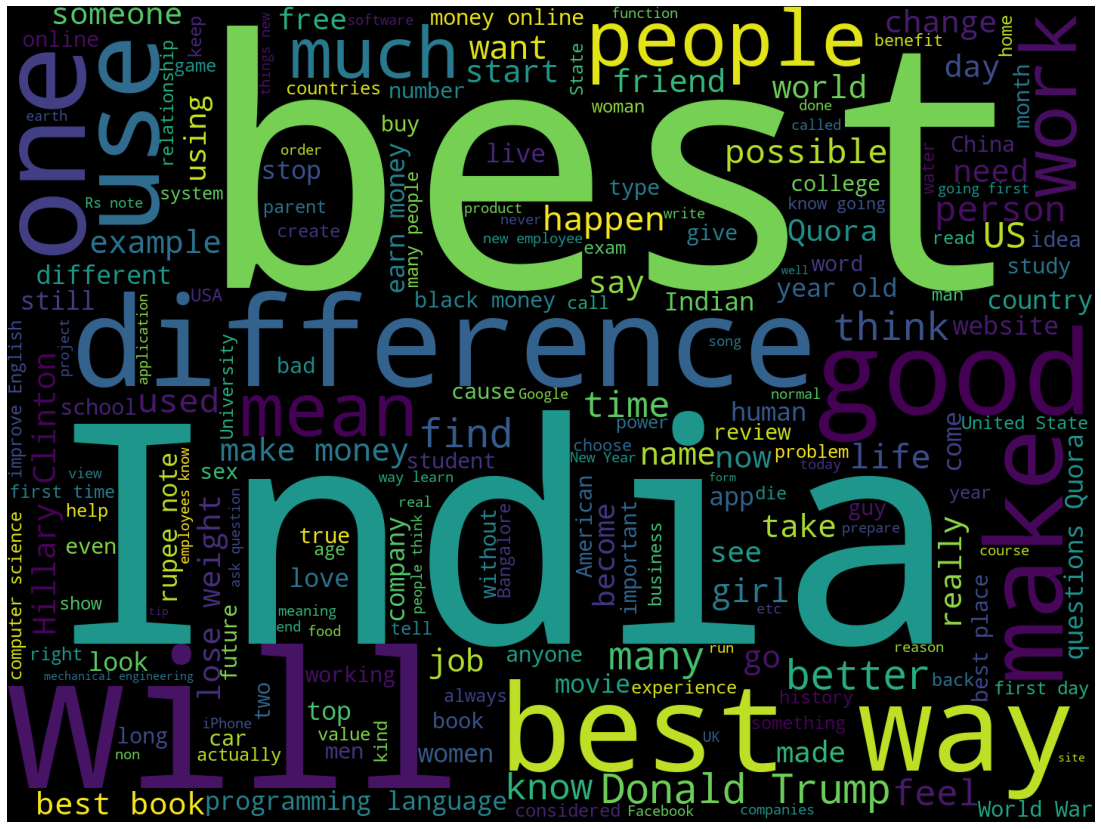

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

##Unique vs. repeated Questions

In [ ]:
qids=pd.Series(train_set['qid1'].tolist()+train_set['qid2'].tolist())
qids=qids.value_counts()
qids

2559      40
4044      33
30782     31
17978     25
18753     24
          ..
142231     1
140182     1
146325     1
144276     1
159758     1
Length: 194716, dtype: int64

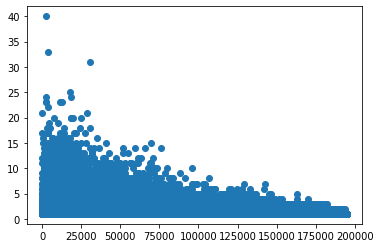

In [ ]:
plt.scatter(qids.index, qids)

In [ ]:
unique_ids=qids.index
print('Number of unique ids={}'.format(len(unique_ids)))

Number of unique ids=194716


In [ ]:
qs_morethan_onetime=np.sum(qids>1)
print('Number of unique questions that appears more than once={}'.format(np.sum(qids>1)))
percentage_morethan_once=np.mean(qids>1)
print('Percentage of unique questions that appears more than once={:.2f}%'.format(percentage_morethan_once*100))

Number of unique questions that appears more than once=24750
Percentage of unique questions that appears more than once=12.71%


In [ ]:
qs_max=np.max(qids)
qs_max
print('Max number of times a single question is repeated={}'.format(qs_max))

Max number of times a single question is repeated=40


In [ ]:
# check if there are any duplicated pair of questions
pair_duplicates=train_set.groupby(['qid1','qid2'])['id'].count()
pair_duplicates

qid1    qid2  
1       2         1
3       4         1
4       32881     1
5       6         1
7       8         1
                 ..
194707  194708    1
194709  194710    1
194711  171467    1
194712  194713    1
194715  194716    1
Name: id, Length: 120000, dtype: int64

In [ ]:
if np.sum(pair_duplicates>1)==0:
  print('There is no duplicate pair of questions')

There is no duplicate pair of questions


##Frequency of different questions

In [ ]:
qids

2559      40
4044      33
30782     31
17978     25
18753     24
          ..
142231     1
140182     1
146325     1
144276     1
159758     1
Length: 194716, dtype: int64

Text(0, 0.5, 'Count')

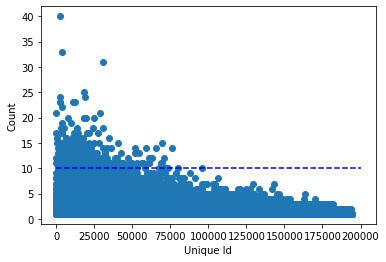

In [ ]:
plt.scatter(qids.index, qids)
plt.hlines(y=10, xmax=200000, xmin=0, linestyles='dashed', colors='b')
plt.xlabel('Unique Id')
plt.ylabel('Count')

##Missing values

In [ ]:
train_set.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [ ]:
train_set[train_set.isnull().any(axis=1)]   # check if 'True' is present in rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0


In [ ]:
#Fill an empty space inplace of Null value
train_set=train_set.fillna('')
train_set.isnull().sum(axis=0)

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
train_set[train_set.isnull().any(axis=1)] # we don't have any Null value in our dataframe

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
test_set=test_set.fillna('')
test_set[test_set.isnull().any(axis=1)]

,test_id,question1,question2


##Basic Feature Extraction (get to know the data)

**New features construction**<br/>

*   **freq_qid1**=Frequency of qid1
*   **freq_qid2**=Frequency of qid2
*   **q1len**=Length of q1 (Characters+space)
*   **q2len**=Length of q2
*   **q1_n_words**=Number of words in Question 1
*   **q2_n_words**=Number of words in Question 2
*   **word_Common**=Number of common words in question 1 and question 2
*   **word_Total**=Total number of word in question 1 and question 2
*   **word_Share**=word_Common/Total_word
*   **freq_q1+freq_q2**=sum total of frequency of qid1 and qid2
*   **freq_q1-freq_q2**=absoulte difference of frequency of qid1 and qid2




In [ ]:
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
train_set['freq_qid1']=train_set.groupby('qid1')['id'].transform('count')  # pandas.DataFrame.transform -> Call func on self producing a DataFrame with transformed values|same lenght - similar with window function in SQL
train_set['freq_qid2']=train_set.groupby('qid2')['id'].transform('count')  
train_set['q1len']=train_set['question1'].str.len()  # pandas.Series.str.len -> Compute the length of each element in string (characters+spaces)
train_set['q2len']=train_set['question2'].str.len()
train_set['q1_n_words']=train_set['question1'].apply(lambda x: len(str(x).split(' ')))
train_set['q2_n_words']=train_set['question2'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
def normalized_word_Common(row):
  w1=set(map(lambda x: x.lower().strip(), str(row['question1']).split(' ')))
  w2=set(map(lambda x: x.lower().strip(), str(row['question2']).split(' ')))
  return 1.0*len(w1 & w2)
train_set['word_Common']=train_set.apply(normalized_word_Common, axis=1)

In [ ]:
def normalized_word_Total(row):
  w1=set(map(lambda x: x.lower().strip(), str(row['question1']).split(' ')))
  w2=set(map(lambda x: x.lower().strip(), str(row['question2']).split(' ')))
  return (len(w1)+len(w2))*1.0
train_set['word_Total']=train_set.apply(normalized_word_Total, axis=1)

In [ ]:
train_set['word_share']=train_set['word_Common']/train_set['word_Total']
train_set['freq_q1+freq_q2']=train_set['freq_qid1']+train_set['freq_qid2']
train_set['freq_q1-freq_q2']=np.abs(train_set['freq_qid1']-train_set['freq_qid2'])

In [ ]:
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,4.0,20.0,0.200000,2,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2.0,20.0,0.100000,2,0


In [ ]:
train_set.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+freq_q2,freq_q1-freq_q2
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,59999.500000,88273.497000,88405.299650,0.372075,1.549633,1.612233,59.329900,59.974017,10.913925,11.168658,4.508042,21.079883,0.223695,3.161867,0.658133
std,34641.160489,56829.791002,57022.605467,0.483360,1.468044,1.847872,29.874824,34.050888,5.425334,6.367629,3.095849,8.611147,0.128259,2.817369,1.665168
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,2.000000,0.000000
25%,29999.750000,37634.500000,37368.500000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.125000,2.000000,0.000000
50%,59999.500000,83883.000000,83947.500000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.217391,2.000000,0.000000
75%,89999.250000,136531.250000,137105.750000,1.000000,1.000000,1.000000,71.000000,71.000000,13.000000,13.000000,6.000000,25.000000,0.318182,3.000000,1.000000
max,119999.000000,194715.000000,194716.000000,1.000000,18.000000,31.000000,623.000000,1169.000000,125.000000,237.000000,38.000000,166.000000,0.500000,39.000000,30.000000


In [ ]:
print('Minimum length of the questions in question1 = {}'.format(np.min(train_set['q1_n_words'])))
print('Minimum length of the questions in question2 = {}'.format(np.min(train_set['q2_n_words'])))
print('Number of questions with minimum length in question1 = {}'.format((train_set['q1_n_words']==1).sum()))
print('Number of questions with minimum length in question2 = {}'.format((train_set['q2_n_words']==1).sum()))

Minimum length of the questions in question1 = 1
Minimum length of the questions in question2 = 1
Number of questions with minimum length in question1 = 20
Number of questions with minimum length in question2 = 7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


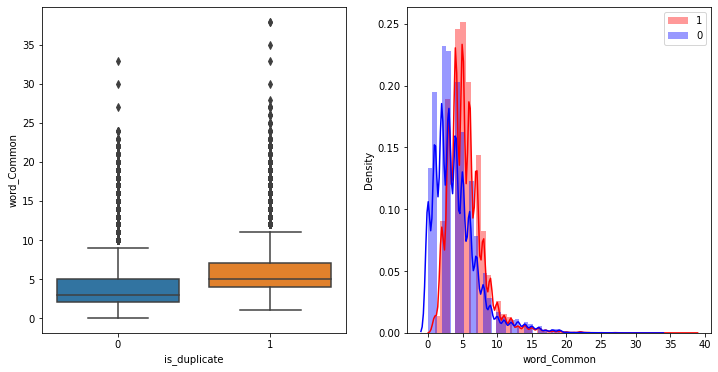

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_Common', data = train_set)

plt.subplot(1,2,2)
sns.distplot(train_set[train_set['is_duplicate'] == 1.0]['word_Common'] , label = "1", color = 'red')
sns.distplot(train_set[train_set['is_duplicate'] == 0.0]['word_Common'], label = "0" , color = 'blue' )
plt.legend()
plt.show()



*   The distribution of the word_Common feature in duplicate or non-duplicate pair are highly overlap. Therefore, this feature can not be used for classification



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


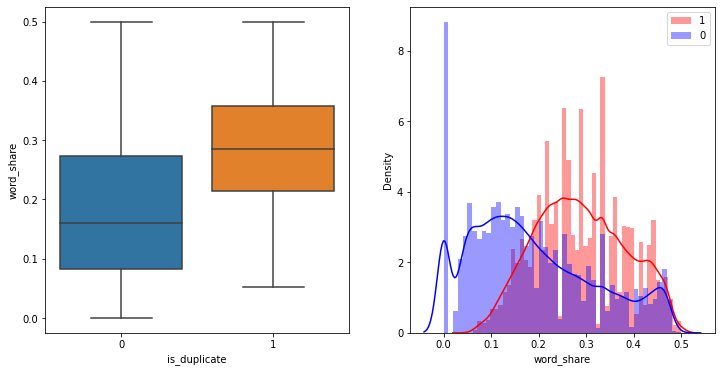

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'is_duplicate', y = 'word_share', data = train_set)

plt.subplot(1,2,2)
sns.distplot(train_set[train_set['is_duplicate'] == 1.0]['word_share'] , label = "1", color = 'red')
sns.distplot(train_set[train_set['is_duplicate'] == 0.0]['word_share'], label = "0" , color = 'blue' )
plt.legend()
plt.show()

bold text#NLP related (from Datacamp)

> Indented block

> Indented block

> Indented block

> Indented block

1.   List item

1.   List item
2.   List item


2.   List item











# NLP related
1. **Preprocessing** 
  - Tokenization to create a bag of words
  - lowercasing words
  - Lemmatization/Stemming (shorten words to their root stems)
  - removing stop words, puncutation or unwanted words. 

##Tokenization

In [ ]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

### Regular expression & Word tokenization
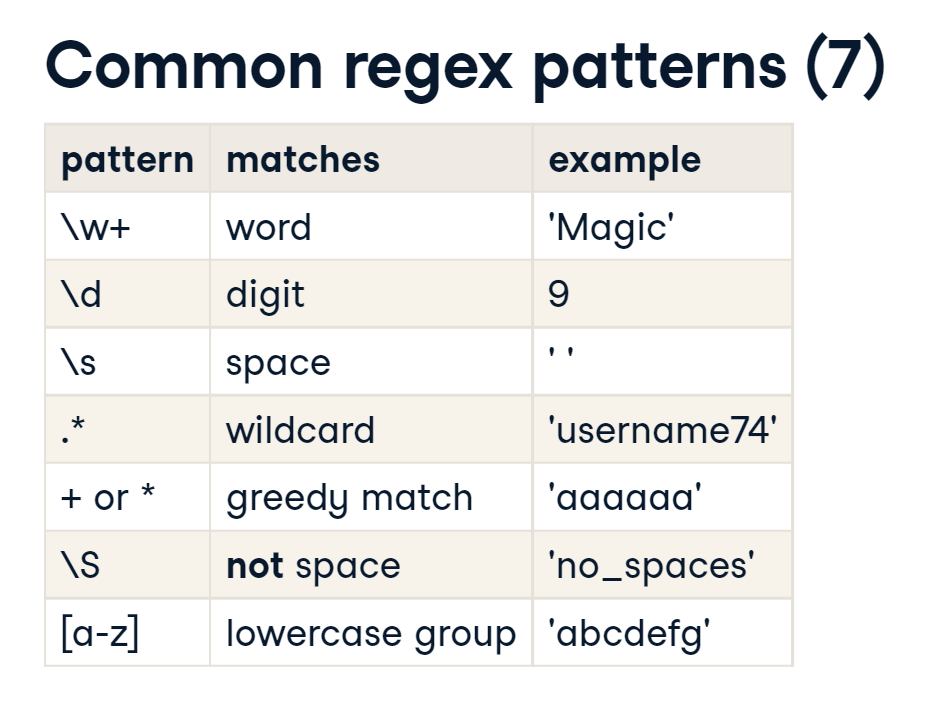

### Regex groups
* Or -> |
* define a group -> ()
* define a explicit character ranges -> []

In [ ]:
import re

In [ ]:
# find all digits and words
match_digits_and_words = ('(\w+|\d+)')
re.findall(match_digits_and_words, 'he has 11 cats')

['he', 'has', '11', 'cats']

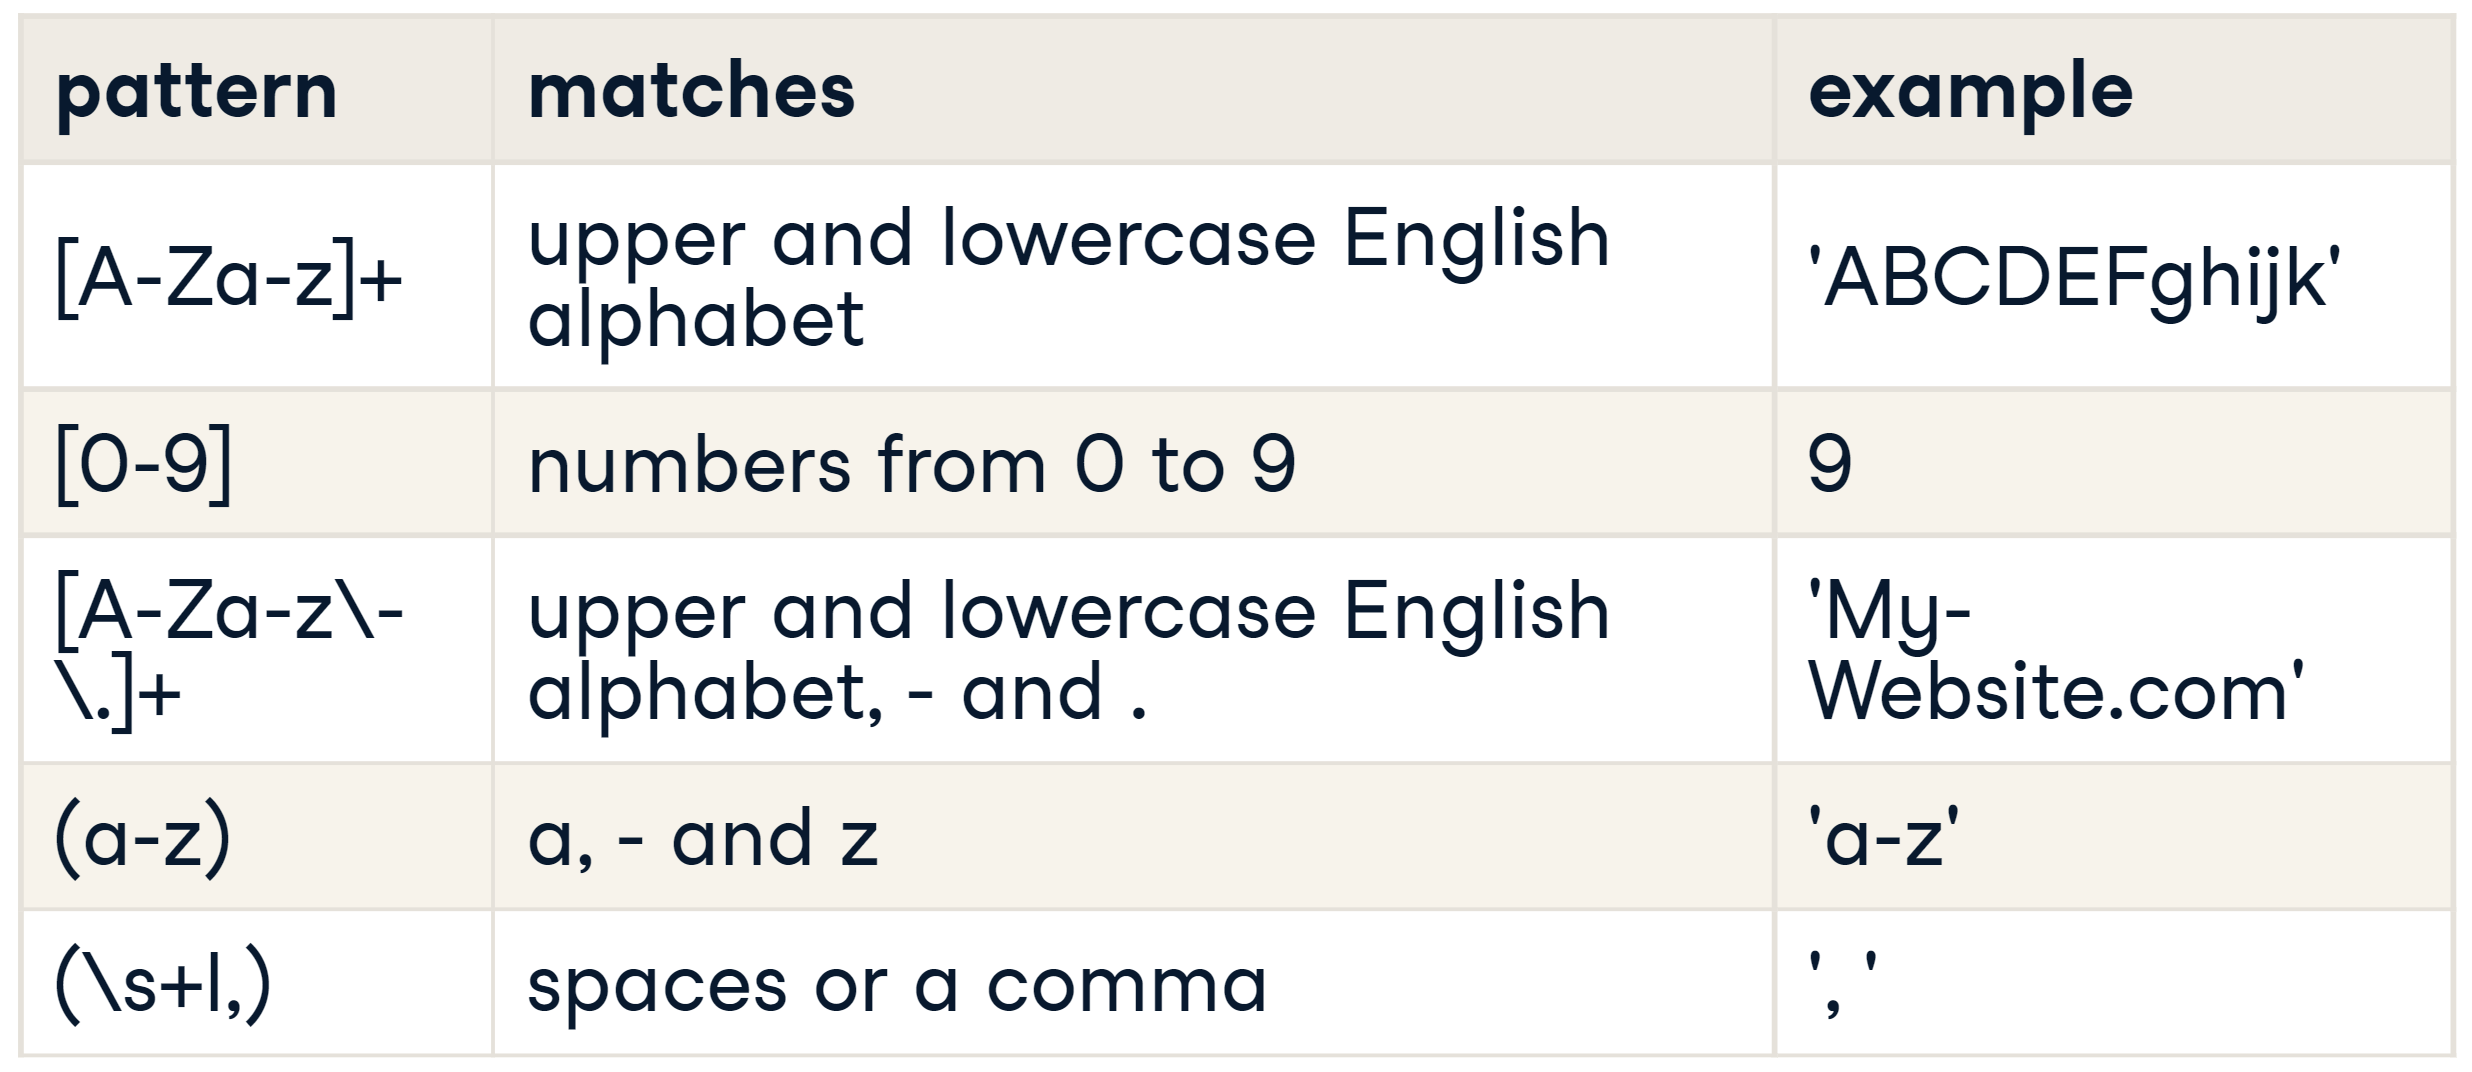

In [ ]:
# lowercase ascii+digits+spaces, once it hits comma, it can't match any more 
pattern = ('[a-z0-9 ]+')  
my_str = 'he has 12 cats and 10 dogs, but not ribbits'  
re.match(pattern, my_str)

<re.Match object; span=(0, 26), match='he has 12 cats and 10 dogs'>

In [ ]:
sentences_endings = r"[.?!]"  # pattern  
re.split(sentences_endings, my_string)

["Let's write RegEx",
 "  Won't that be fun",
 '  I sure think so',
 '  Can you find 4 sentences',
 '  Or perhaps, all 19 words',
 '']

In [ ]:
#Find all capitalized words A-Z
pattern = r"[A-Z]\w+"
re.findall(pattern, my_string)

['Let', 'RegEx', 'Won', 'Can', 'Or']

In [ ]:
# split my_string on spaces
pattern = r"\s+"
re.split(pattern, my_string)

["Let's",
 'write',
 'RegEx!',
 "Won't",
 'that',
 'be',
 'fun?',
 'I',
 'sure',
 'think',
 'so.',
 'Can',
 'you',
 'find',
 '4',
 'sentences?',
 'Or',
 'perhaps,',
 'all',
 '19',
 'words?']

In [ ]:
# Findall all digits
pattern = r"\d+"
re.findall(pattern, my_string)

['4', '19']

### Difference between **re.match & re.search**
- If you need find a pattern that might not be at the beginning og the string, you should use **"re.search"**

In [ ]:
re.match('cd','abcde')

In [ ]:
re.search('cd','abcde')

<re.Match object; span=(2, 4), match='cd'>

In [ ]:
scence_one = "After three weeks of hot weather and drought,we've had a week of cold and rain,\
just the way it ought to be here in the north,\
            in June, a fire going..."

In [ ]:
# search for the first occurrence of "three"
match = re.search("three", scence_one)

In [ ]:
# print the start and end indexes of match
print(match.start(), match.end())

6 11


In [ ]:
# script notation, e.g. 'Author:'
pattern = r"[\w\s]+:"  

### Regex with NLTK tokenization

In [ ]:
from nltk.tokenize import regexp_tokenize

In [ ]:
# Find hashtags (#)
pattern=r"#\w+"  
tweets = 'This is the best #nlp exercise ive found online! #python'
hashtags = regexp_tokenize(tweets, pattern)
hashtags

['#nlp', '#python']

In [ ]:
# Find both mentions (@) and hashtags (#)
pattern2= r"([#|@]\w+)"
tweets = 'Thanks @datacamp :) #nlp #python'
mentions_hashtags = regexp_tokenize(tweets, pattern2)
mentions_hashtags

['@datacamp', '#nlp', '#python']

In [ ]:
# using TweetTokenizer to tokenize all tweets into one list
from nltk.tokenize import TweetTokenizer
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning']
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
all_tokens

[['This',
  'is',
  'the',
  'best',
  '#nlp',
  'exercise',
  'ive',
  'found',
  'online',
  '!',
  '#python'],
 ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning']]

In [ ]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [ ]:
# tokenize all words
import nltk
nltk.download('punkt')

from nltk import word_tokenize
word_tokenize(german_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Wann',
 'gehen',
 'wir',
 'Pizza',
 'essen',
 '?',
 '🍕',
 'Und',
 'fährst',
 'du',
 'mit',
 'Über',
 '?',
 '🚕']

In [ ]:
# Tokenize all capital words
pattern1 = r"[A-ZÜ]\w+"
regexp_tokenize(german_text, pattern1)

['Wann', 'Pizza', 'Und', 'Über']

In [ ]:
# Tokenize emjio
# Unicode ranges for emoji are:
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
regexp_tokenize(german_text, emoji)

['🍕', '🚕']

Spacy vs Gensim
https://info.cambridgespark.com/latest/word-embeddings-in-python


##Bag-of-words (BoW)

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from collections import Counter
article = "The cat is in the box. The cat likes the box. The box is over the cat"
tokens = word_tokenize(article)
lower_tokens = [t.lower() for t in tokens]  # convert all tokens into lowercase
count = Counter(lower_tokens)
count

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Counter({'.': 2,
         'box': 3,
         'cat': 3,
         'in': 1,
         'is': 2,
         'likes': 1,
         'over': 1,
         'the': 6})

In [ ]:
count.most_common(2)  # return top 2 tokens in terms of frequency

[('the', 6), ('cat', 3)]

## Removing stopwords

In [ ]:
text = "The cat is in the box. The cat likes the box. The box is over the cat"
tokens = word_tokenize(text.lower())
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 '.',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 '.',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [ ]:
# remove the non-alphabetical characters
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()] 
tokens

['the',
 'cat',
 'is',
 'in',
 'the',
 'box',
 'the',
 'cat',
 'likes',
 'the',
 'box',
 'the',
 'box',
 'is',
 'over',
 'the',
 'cat']

In [ ]:
# remove the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
no_stops = [t for t in tokens if t not in stopwords.words('english')]
no_stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['cat', 'box', 'cat', 'likes', 'box', 'box', 'cat']

In [ ]:
Counter(no_stops).most_common(3)

[('cat', 3), ('box', 3), ('likes', 1)]

##Lemmatization

In [ ]:
poem ="""You will say it was quite unintentional,
this leaving the building without saying good-bye.
(“Can’t I depart, just once,
thinking only of daisies and chocolate pudding?…”)

There are in this world enchanters and enchantees.
It’s only the latter whose hearts are chained to heavy

    stones,
who could no more leave a room, forgetting you,
than they could, for several minutes, forget to breathe.

How lightly a goddess walks the earth,
evoking smiles in everyone,
but, still, you break our hearts–
like tigers stepping on sparrows’ eggs,
like a deer, walking silently through a strand of spiders’ silk,
taut between trees,
you break our hearts."""

In [ ]:
alpha_only = [w for w in word_tokenize(poem.lower()) if w.isalpha()]

In [ ]:
Counter(alpha_only).most_common(10)

[('you', 4),
 ('a', 4),
 ('the', 3),
 ('it', 2),
 ('this', 2),
 ('only', 2),
 ('of', 2),
 ('and', 2),
 ('are', 2),
 ('in', 2)]

In [ ]:
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

In [ ]:
Counter(no_stops).most_common(10)

[('hearts', 2),
 ('could', 2),
 ('break', 2),
 ('like', 2),
 ('say', 1),
 ('quite', 1),
 ('unintentional', 1),
 ('leaving', 1),
 ('building', 1),
 ('without', 1)]

In [ ]:
# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
Counter(lemmatized).most_common(10)

[('heart', 2),
 ('could', 2),
 ('break', 2),
 ('like', 2),
 ('say', 1),
 ('quite', 1),
 ('unintentional', 1),
 ('leaving', 1),
 ('building', 1),
 ('without', 1)]

## **gensim** (NLP library)
  - Build document or word vectors
  - Performing topic identification and document comparsion

In [ ]:
from gensim.corpora.dictionary import Dictionary

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
my_documents = "God is Great Great! I won a big big lottery."

In [ ]:
from nltk.tokenize import sent_tokenize
my_documents = sent_tokenize(my_documents)
my_documents

['God is Great Great!', 'I won a big big lottery.']

In [ ]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
tokenized_docs

[['god', 'is', 'great', 'great', '!'],
 ['i', 'won', 'a', 'big', 'big', 'lottery', '.']]

In [ ]:
dictionary = Dictionary(tokenized_docs)  # create a mapping with an id for each token
dictionary

In [ ]:
dictionary.token2id

{'!': 0,
 '.': 4,
 'a': 5,
 'big': 6,
 'god': 1,
 'great': 2,
 'i': 7,
 'is': 3,
 'lottery': 8,
 'won': 9}

In [ ]:
# word -> id
dictionary.token2id.get('won')  # select the id for 'won'

9

In [ ]:
# id -> get word
dictionary.get(8)

'lottery'

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus
# output (token_id from the dictionary, frequency in the document)

[[(0, 1), (1, 1), (2, 2), (3, 1)],
 [(4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1)]]

In [ ]:
# sort the doc for frequency
doc = corpus[1]
bow_doc = sorted(doc, key=lambda x: x[1], reverse=True)
bow_doc

[(6, 2), (4, 1), (5, 1), (7, 1), (8, 1), (9, 1)]

In [ ]:
# Print top 3 words of the document alongside the count
for word_id, word_count in bow_doc[:3]:
  print(dictionary.get(word_id), word_count)

big 2
. 1
a 1


In [ ]:
dictionary.token2id

{'!': 0,
 '.': 4,
 'a': 5,
 'big': 6,
 'god': 1,
 'great': 2,
 'i': 7,
 'is': 3,
 'lottery': 8,
 'won': 9}

##Tf-idf with gensim

In [ ]:
from gensim.models.tfidfmodel import TfidfModel

In [ ]:
tfidf = TfidfModel(corpus)   # corpus : (token_id from the dictionary, frequency in the document)

In [ ]:
tfidf[corpus[0]]

[(0, 0.3779644730092272),
 (1, 0.3779644730092272),
 (2, 0.7559289460184544),
 (3, 0.3779644730092272)]

In [ ]:
tfidf_weights = tfidf[corpus[1]]   # (token_id, token_weight)
tfidf_weights

[(4, 0.3333333333333333),
 (5, 0.3333333333333333),
 (6, 0.6666666666666666),
 (7, 0.3333333333333333),
 (8, 0.3333333333333333),
 (9, 0.3333333333333333)]

In [ ]:
sorted_tfidf_weights = sorted(tfidf_weights, key = lambda w:w[1], reverse=True)
sorted_tfidf_weights

[(6, 0.6666666666666666),
 (4, 0.3333333333333333),
 (5, 0.3333333333333333),
 (7, 0.3333333333333333),
 (8, 0.3333333333333333),
 (9, 0.3333333333333333)]

In [ ]:
for term_id, weight in sorted_tfidf_weights[:3]:
  print(dictionary.get(term_id), weight)

big 0.6666666666666666
. 0.3333333333333333
a 0.3333333333333333


In [ ]:
tfidf_weights = [tfidf[doc] for doc in corpus]
tfidf_weights

[[(0, 0.3779644730092272),
  (1, 0.3779644730092272),
  (2, 0.7559289460184544),
  (3, 0.3779644730092272)],
 [(4, 0.3333333333333333),
  (5, 0.3333333333333333),
  (6, 0.6666666666666666),
  (7, 0.3333333333333333),
  (8, 0.3333333333333333),
  (9, 0.3333333333333333)]]

## SpaCy (NLP library)
  - Create NLP **pipelines** to generate corpora and models
  - open-source, with extra libraries and tools
    - Displacy (a visualization tool for viewing parse trees)
  - Informal language corpora
    - easily find entities in Tweets and chat messages

### Entity recognition

In [ ]:
import spacy
nlp = spacy.load('en')  # pre-trained corpus
nlp.entity

In [ ]:
doc = nlp("""Berlin is the capital of Germany;
         and the residence of Chancellor Angela Merkel""")   # pass a string into nlp variable

In [ ]:
doc.ents  # SpaCy properly tagged and identified the three main entities in the sentence

(Berlin, Germany, Angela Merkel)

In [ ]:
print(doc.ents[0], doc.ents[0].label_)  # GPE geopolitical entity

Berlin GPE


In [ ]:
for ent in doc.ents:
  print(ent.label_, ent.text)

GPE Berlin
GPE Germany
PERSON Angela Merkel


## polyglot
- vectors from differnent languages
- more than 130 (can be used for translation)

### Entity recognition

In [ ]:
!pip install polyglot
!pip install PyICU
!pip install pycld2
!pip install morfessor

     |████████████████████████████████| 133kB 4.3MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52579 sha256=c5180fef810f4845a387d49960da74835fbcba05f8f3151bc709f3191ecd79d9
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot
     |████████████████████████████████| 307kB 4.1MB/s 
  Created wheel for PyICU: filename=PyICU-2.7.4-cp37-cp37m-linux_x86_64.whl size=1374610 sha256=14ff79a967e5135ea9451ba20b7d3ef6da50025076c2242084621c6cd135f8b7
  Stored in directory: /root/.cache/pip/wheels/1e/86/14/44874b2d8ecf81ca9beb8807b7a9a00d6eeeed7d0c7d94c793
Successfully built PyICU
     |████████████████████████████████| 41.4MB 75kB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834257 sha256=7b13e3c1894f90692744188107ffdd0d4f55e2f90ad65c3f657f0c1ccbf16767
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3

In [ ]:
from polyglot.text import Text

In [ ]:
text = "Voyez faits saillants de la conférence de presse du 15 juin du ministre de la Santé Christian Dubé, accompagné du directeur national de la santé publique Horacio Arruda et du directeur de la campagne de vaccination contre la COVID-19 au Québec, Daniel Paré sur l’épidémie de COVID-19." 

In [ ]:
ptext = Text(text)  # polyglot doesn't need to be told which language you are using

In [ ]:
!polyglot download embeddings2.fr
!polyglot download ner2.fr

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...


In [ ]:
ptext.entities

[I-PER(['Christian', 'Dubé']),
 I-PER(['Horacio', 'Arruda']),
 I-LOC(['Québec']),
 I-PER(['Daniel', 'Paré'])]

In [ ]:
[(ent.tag, ' '.join(ent)) for ent in ptext.entities]

[('I-PER', 'Christian Dubé'),
 ('I-PER', 'Horacio Arruda'),
 ('I-LOC', 'Québec'),
 ('I-PER', 'Daniel Paré')]

In [ ]:
# determine how many entities contain the words "Christian Dubé" or "Horacio Arruda"

count = 0
for ent in ptext.entities:
  if "Christian" in ent or "Horacio" in ent:
    count+=1
print(count)
percentage = count/len(ptext.entities)
print(percentage)

2
0.5


## Train and test a classfication model with scihit-learn 




In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/NLP project/fake_or_real_news.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df.iloc[:,:4]
df.sample(5)

,Unnamed: 0,title,text,label
830,6865,Doctor Finds New Life As A Clown More Fulfilli...,Tweet \nPediatrician Jim Smith is thrilled wit...,FAKE
7541,9656,Humans Came Out Of Australia Not Africa,Humans Came Out Of Australia Not Africa By Dai...,FAKE
2738,2617,Netanyahu scores stunning victory – but at wha...,The Israeli leader may be able to form a more ...,REAL
4365,5052,"To nominate Clinton, it takes a village",Donald Trump is a singular political phenomeno...,REAL
7229,#NAME?,today should be a quintessentially perfect fa...,highs still aim for the upper 60s.”,NaN


In [ ]:
df= df[df['label'].isin(['FAKE','REAL'])]
y = df['label']
y.value_counts()

REAL    3161
FAKE    3154
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [ ]:
X_train.shape

(4231,)

In [ ]:
X_test.shape

(2084,)

In [ ]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [ ]:
count_train = count_vectorizer.fit_transform(X_train) 
count_train.shape

(4231, 55071)

In [ ]:
y_train.shape

(4231,)

In [ ]:
y.value_counts()

REAL    3161
FAKE    3154
Name: label, dtype: int64

In [ ]:
count_test = count_vectorizer.transform(X_test)
count_test.shape

(2084, 55071)

In [ ]:
# print the first 10 fratures of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000031', '00000031', '000035', '00006', '0001', '000billion', '000ft']


In [ ]:
# Print the first 5 vectors of the counter_vectorizer
print(count_train.A)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Create a CountVectorizer DataFrame
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,000,0000,000000031,00000031,000035,00006,0001,000billion,000ft,001,0011,002,003,004,004s,006,00684,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,011,014,015,016,018,01am,02,020,022,023,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Naive Bayes Model (Simple and effective)
  - Commonly used for testing NLP classification problems
  - Basis in **probability**
  - Given a particular piece of data, how likely is a particular outcome?
    - for example:
     1. If the plot has a spaceship, how likely is it to be sci-fi?
     2. Given a spaceship and an alien, how likely now is it sci-fi?
  - Each word from CountVectorizer acts as a feature

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
# also used for multiple label classification
# may not work as well woth floats, e.g. tfidf weighted input

from sklearn import metrics  # evaulate the performance

In [ ]:
# Initilize the class
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)  # input: X -> count_train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred = nb_classifier.predict(count_test)

In [ ]:
metrics.accuracy_score(y_test.fillna(''), pred)

0.8953934740882917

In [ ]:
metrics.confusion_matrix(y_test.fillna(''), pred, labels=['FAKE','REAL'])

array([[910, 133],
       [ 85, 956]])

In [ ]:
# Get the class labels
nb_classifier.classes_

array(['FAKE', 'REAL'], dtype='<U4')

In [ ]:
nb_classifier.coef_

array([[-11.61269035,  -7.08009086, -13.80991493, ..., -13.80991493,
        -13.80991493, -13.80991493]])

In [ ]:
# Zip the feature names together with the coefficient array and sort by weights
feat_with_weights = sorted(zip(count_vectorizer.get_feature_names(), nb_classifier.coef_[0]))
feat_with_weights[:5]

[('00', -11.612690354270894),
 ('000', -7.080090861117639),
 ('0000', -13.809914931607114),
 ('000000031', -13.116767751047169),
 ('00000031', -13.116767751047169)]

##Sentiment analysis
- the process of understanding the opinion of an author about a subject

* What goes into a sentiment analysis system?
 1. Opinion/emotion
    * Opinion(polarity): positve/ netrual/ negative 
    * Emotion: Joy/ Supprise/ Anger/ Disgust
 2. Subject of discussion: What is being talked about?
    * moive/ book/ project
 3. Opinion holder (entity): By whom?
    
* Why sentiment analysis?
  * Social media monitoring: not only what people talking about but how they are talking about it
  * Brand monitoring/ Customer service/ Product analutics/ Market research and analysis

###Import data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/NLP project/IMDB_sample.csv')

In [ ]:

df.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


In [ ]:
# Find the number of positive and negative reviews
df['label'].value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [ ]:
# Find the proportion of postive and negative reviews
df['label'].value_counts()/len(df)

0    0.504199
1    0.495801
Name: label, dtype: float64

In [ ]:
# Find the length of the longest review (characters, not words)
df['length_reviews'] =  df['review'].str.len()
df.head()

,Unnamed: 0,review,label,length_reviews
0,18245,This short spoof can be found on Elite's Mille...,0,667
1,19801,A singularly unfunny musical comedy that artif...,0,2982
2,3222,"An excellent series, masterfully acted and dir...",1,669
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691
4,16355,I was gifted with this movie as it had such a ...,0,1087


In [ ]:
length_reviews = df['review'].str.len()

In [ ]:
len('This short spoof can be found on')

32

### Two types of algorithms for detecting sentiment





#### **Rule/Lexicon-based approach:** 
-based on a lexicon of pre-trained words and their corresponding polarity score

In [ ]:
from textblob import TextBlob

In [ ]:
# longest review
longest = max(length_reviews)
longest

10321

In [ ]:
longest_review = df['review'][df['length_reviews']==longest]
titanic = longest_review.values.tolist()
titanic=titanic[0]
titanic

"Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of th

In [ ]:
# create a textblob object
blob_titanic = TextBlob(titanic)

In [ ]:
# print out the sentiment
blob_titanic.sentiment  # ploarity: -1 negative, 0 netrual, 1 postive  # subjectivity: -1 objective, 1 subjective
# slightly positive

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

## Create a Word Cloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
cloud_titanic = WordCloud(background_color='white').generate(titanic)
# cloud_titanic = WordCloud(background_color='white', stopwords = my_stopwords).generate(titanic)

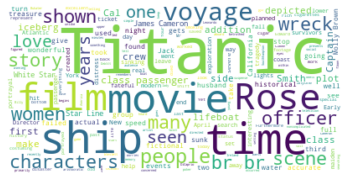

In [ ]:
plt.imshow(cloud_titanic, interpolation='bilinear')
plt.axis('off')
plt.show()

##Bag-of-words (BOW)
- discribe the occurrance of words within a document or a collection of documents (corpus)
- Builds a dictionary of words and a measure of their presence

* lose word order and grammer rules


###1. CountVectorizer in Sklearn

In [ ]:
df.head()

,Unnamed: 0,review,label,length_reviews
0,18245,This short spoof can be found on Elite's Mille...,0,667
1,19801,A singularly unfunny musical comedy that artif...,0,2982
2,3222,"An excellent series, masterfully acted and dir...",1,669
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691
4,16355,I was gifted with this movie as it had such a ...,0,1087


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vect=CountVectorizer(max_features=1000)  # Pick the 1000 most frequent words accross the corpous of reviews
vect.fit(df['review'])         # input: pd.series/ list containing many sentences
X = vect.transform(df['review'])
X[:5]

<5x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 427 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse matrix -> array
my_array = X.toarray()
my_array[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Transform back to a dataframe, assign the column name
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_df.head()

,10,20,30,80,able,about,above,absolutely,across,act,acted,acting,action,actor,actors,actress,actual,actually,add,after,again,against,age,ago,agree,air,all,almost,alone,along,already,also,although,always,am,amazing,america,american,among,an,...,will,william,wish,with,within,without,woman,women,won,wonder,wonderful,word,words,work,worked,working,works,world,worse,worst,worth,would,wouldn,write,writer,writers,writing,written,wrong,wrote,year,years,yes,yet,york,you,young,your,yourself,zombie
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,1,0,0,0,0,0,0,0,1,...,2,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,2,0,0,1,0,3,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Capture context with a BOW 
- I am happy, not sad
- I am sad, not happy

#### n-grams with the CountVectorizer
- Longer sequence of tokens (larger n)
  1. results in more features
  2. High precison of ML-models
  3. Risk of overfitting 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vect = CountVectorizer(ngram_range=(min_n, max_n))
ngram_range=(1, 1)  # only unigrams
ngram_range=(1,2)  # Uni- and bigrams

#### Specifty vocablary size

```
CountVectorizer(max_features, max_df, min_df)
```
* max_features: include only the top most frequent words in the vocaluary
* max_df: ignore terms with higher than specfied frequency
* min_df: ignore terms with lower than specfied frequency

##### Build a numeric representation of the review using uni- and bigrams

In [ ]:
vect_uni_bigrams = CountVectorizer(ngram_range=(1,2), max_features=1000)
vect_uni_bigrams.fit(df['review'])
X_review = vect_uni_bigrams.transform(df['review'])

In [ ]:
X_df = pd.DataFrame(X_review.toarray(), columns=vect_uni_bigrams.get_feature_names())
X_df.head()

,10,able,able to,about,about it,about the,about this,absolutely,across,act,acting,acting is,action,actor,actors,actress,actually,after,after the,again,against,age,ago,all,all of,all the,almost,alone,along,already,also,although,always,am,amazing,american,an,and,and even,and he,...,with his,with the,with this,without,woman,women,won,wonder,wonderful,word,words,work,works,world,worse,worst,worth,would,would be,would have,wouldn,writer,writing,written,wrong,year,years,yes,yet,you,you are,you can,you have,you ll,you re,you want,you will,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3,1,2,2,0,0,0,1,0,0,0,0,0,1,11,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,1,3,0,1,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,7,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,...,0,0,1,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Language Detect

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 4.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=6ac6f8e44788ff0205f7dec273fec5c04fbc4a96544ae3e221d0dd90b18e2523
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
from langdetect import detect_langs

In [ ]:
foregin = '李白乘舟将欲行, 忽闻岸上踏歌声。 桃花潭水深千尺，不及汪伦送我行.'
detect_langs(foregin)  # [language name, probability that the string is in this particular language]

[ko:0.5714277318069533, zh-cn:0.4285711696556644]

### Build a feature for the language (deal with dataframe)

In [ ]:
# 1. series.apply()
df['review'].apply(detect_langs)

0       [en:0.9999964494153852]
1       [en:0.9999967877081769]
2       [en:0.9999943428227561]
3       [en:0.9999971301748369]
4       [en:0.9999966158307049]
                 ...           
7496    [en:0.9999970104566142]
7497    [en:0.9999956998236562]
7498    [en:0.9999964832825365]
7499    [en:0.9999983730989663]
7500    [en:0.9999966262880324]
Name: review, Length: 7501, dtype: object

In [ ]:
# 2. for loop
languages = []
for row in range(len(df['review'])):
  languages.append(
      detect_langs(df['review'][row])
  )

In [ ]:
languages[0]

[en:0.999998127393309]

In [ ]:
str(languages[0][0]).split(":")

['en', '0.999998127393309']

In [ ]:
str(languages[0][0]).split(":")[0]

'en'

In [ ]:
df['languages'] = [str(x[0]).split(":")[0] for x in languages]
df.head()

,Unnamed: 0,review,label,length_reviews,languages
0,18245,This short spoof can be found on Elite's Mille...,0,667,en
1,19801,A singularly unfunny musical comedy that artif...,0,2982,en
2,3222,"An excellent series, masterfully acted and dir...",1,669,en
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691,en
4,16355,I was gifted with this movie as it had such a ...,0,1087,en


## Stop words
- Words that occur too frequently and not considered informative

### Define stop words from word clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Define the stopwords list
my_stopwords = set(STOPWORDS)
"""
my_stopwords=
{'a',
 'about',
 'above',
 'after',
 'again',...} """

"\nmy_stopwords=\n{'a',\n 'about',\n 'above',\n 'after',\n 'again',...} "

In [ ]:
my_stop_words =  STOPWORDS.update(['moive','moives','film','films','watch', 'br'])

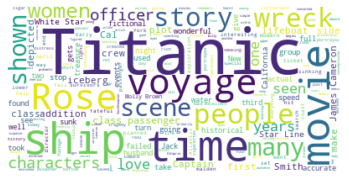

In [ ]:
# cloud_titanic = WordCloud(background_color='white', stopwords = my_stopwords).generate(titanic)
my_cloud = WordCloud(background_color='white', stopwords = my_stop_words).generate(titanic)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Stop words with BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the set of stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['film', 'moive', 'cinema', 'theatre'])  # union: no elements are repeated 


In [ ]:
df.head()

,Unnamed: 0,review,label,length_reviews,languages
0,18245,This short spoof can be found on Elite's Mille...,0,667,en
1,19801,A singularly unfunny musical comedy that artif...,0,2982,en
2,3222,"An excellent series, masterfully acted and dir...",1,669,en
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691,en
4,16355,I was gifted with this movie as it had such a ...,0,1087,en


In [ ]:
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(df['review'])
vect.transform(df['review'])

<7501x45530 sparse matrix of type '<class 'numpy.int64'>'
	with 665826 stored elements in Compressed Sparse Row format>

## String operators and comparsions

- check if a string is **composed only of letters** 
```
my_string.isapha() 

- check if a string is **composed only of digits**
```
my_string.isdigit()
```
- check if a string is **composed only of alphanumeric characters**
```
my_string.isalnum()
```

In [ ]:
# original word tokenization
import nltk
nltk.download('punkt')
from nltk import word_tokenize
word_tokens = [word_tokenize(w) for w in df['review']]
word_tokens[1][:5]

### Keeping only tokens composed of letters


In [ ]:
alpha_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
alpha_tokens[1][:5]

In [ ]:
len(word_tokens[0])

In [ ]:
len(alpha_tokens[0])

### Regular expressions

In [ ]:
import re

my_string = '#Wonderful'
"""
Extract #, followed by any letter, small or capital from my_string
"""

re.search(r'#[A-Za-z]', my_string)

### Token pattern with a BOW

- Default token pattern in CountVectorizer: '\b\w\w+\b' 
  - \b -> word bounary
  - single word is ignored 
  - hasn't -> will be split




In [ ]:
vect = CountVectorizer()   # default token_pattern=r'\b\w\w+\b'
vect.fit(df['review'])
vect.transform(df['review'])
len(vect.get_feature_names())

45840

In [ ]:
vect_1 = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]')
vect_1.fit(df['review'])
vect_1.transform(df['review'])
len(vect_1.get_feature_names())

# fewer features were created when we specified the token pattern. It is a nice way to limit the size of our vocaluary

561

## Stemming and Lemmazition


-  **Stemming:** Transform words to their root forms by chopping off suffixes (e.g. '-ed', '-ing', '-er')
  - staying, stays, stayed -> stay
  - house, houses, housing -> hous
  - Fast and efficient to compute
-  **Lemmatization:** recudes the words to roots that are valid words in language
  - staying, stays, stayed -> stay
  - house, houses, housing -> house

### Stemming of strings

#### PorterStemmer

In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
porter.stem('wonderful')

'wonder'

In [ ]:
porter.stem('Today is a wonderful day!')  # nothing change. we need to stem each word in a sentence separately

'today is a wonderful day!'

In [ ]:
tokens = word_tokenize('Today is a wonderful day!')
stemmed_tokens = [porter.stem(word) for word in tokens]
stemmed_tokens

['today', 'is', 'a', 'wonder', 'day', '!']

#### SnowballStemmer (muptiple languages)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

DutchStemmer = SnowballStemmer('dutch') # specify the foregin language we want to use
DutchStemmer.stem("beginnen")

'beginn'

###Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

WNlemmatizer = WordNetLemmatizer()
WNlemmatizer.lemmatize('wonderful', pos='a') # a -> adjective

LookupError: ignored

## tfidf

### tfidf - sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

####List

In [ ]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

In [ ]:
vect = TfidfVectorizer().fit(annak)  # Agruments: max_features, ngram_range, stop_words, token_pattern, max_df, min_df
X = vect.transform(annak)

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_df

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.301511,0.000000,0.301511,0.000000,0.301511,0.301511,0.301511,0.301511,0.603023,0.301511


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
vect_1 = TfidfVectorizer(ngram_range=(1,2), stop_words=ENGLISH_STOP_WORDS)
vect_1.fit(annak)
X = vect_1.transform(annak)

X_df = pd.DataFrame(X.toarray(), columns=vect_1.get_feature_names())
X_df

,alike,families,families alike,family,family unhappy,happy,happy families,unhappy,unhappy family,unhappy way,way
0,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.666667,0.333333,0.333333,0.333333


#### DataFrame

In [ ]:
vect = TfidfVectorizer(max_features = 100) 
vect.fit(df['review'])
X = vect.transform(df['review'])

NameError: ignored

In [ ]:
type(X)

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
X_df.head()

NotFittedError: ignored

## Compare BOW and Tfidf
- Two approaches to transform text features into numeric ones

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect1 = CountVectorizer(max_features=100).fit(df['review'])
vect2 = TfidfVectorizer(max_features=100).fit(df['review'])

X1 = vect1.transform(df['review'])
X2 = vect2.transform(df['review'])

X1_df = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names()) 
X2_df = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names()) 

print('Top 5 rows using BOW: \n', X1_df.head())
print('Top 5 rows using tfidf: \n', X2_df.head())

## Classifier

In [ ]:
df.head()

NameError: ignored

In [ ]:
df['label'].value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression

X = X1.toarray()   # (7501, 100)
y = df['label']

log_reg = LogisticRegression()
log_reg.fit(X, y)

log_reg.score(X, y)

NameError: ignored

###train_test-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, stratify=y)
# stratify: proportion of classes in the sample produced will be the same as the proportion of vaules provided to this prameter

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.predict(X_test)

NameError: ignored

In [ ]:
log_reg.score(X_train, y_train)

NameError: ignored

In [ ]:
log_reg.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_predicted = log_reg.predict(X_test)
accuracy_score(y_test, y_predicted)

### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)

NameError: ignored

In [ ]:
confusion_matrix(y_test, y_predicted)/len(y_test)

array([[0.37108594, 0.1332445 ],
       [0.1332445 , 0.36242505]])

### log_reg can used in multi-classes

In [ ]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets['airline_sentiment'] = tweets['airline_sentiment'].replace(to_replace=['negative','neutral','positive'], value=[0,1,2])
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
y = tweets['airline_sentiment']
y.head()

0    1
1    2
2    1
3    0
4    0
Name: airline_sentiment, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=100)
tfidf_vect.fit(tweets.text)
X = tfidf_vect.transform(tweets.text)
X

<14640x100 sparse matrix of type '<class 'numpy.float64'>'
	with 119182 stored elements in Compressed Sparse Row format>

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())

In [ ]:
X_df.isnull().any(1).sum()

0

In [ ]:
y.isnull().any().sum()

0

In [ ]:
X_df.head()

,about,after,again,airline,all,am,americanair,amp,an,and,any,are,as,at,back,bag,be,been,but,by,call,can,cancelled,co,customer,delayed,do,don,flight,flightled,flights,for,from,gate,get,got,had,has,have,help,...,of,on,one,or,our,out,over,phone,plane,please,service,so,southwestair,still,thank,thanks,that,the,there,they,this,time,to,today,united,up,us,usairways,ve,virginamerica,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.744013,0.0,0.0,0.668165,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293089,0.0,0.000000,0.0,0.0,0.254706,0.000000,0.0,0.0,0.0,0.0,0.615817,0.601436,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.32904,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.234454,0.580402,0.0,0.0,0.0,0.0,0.000000,0.553614,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.431149,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335039,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.418967,0.0,0.0,0.190265,0.000000,0.0,0.0,0.0,0.0,0.000000,0.449272,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.279754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.489741,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000


In [ ]:
y.head()

0    1
1    2
2    1
3    0
4    0
Name: airline_sentiment, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train, y_train)
log_reg.predict(X_test)

array([0, 0, 2, ..., 1, 0, 0])

### Regularization

- a way to simplify and ensure a less complex model 



In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_reg = LogisticRegression(penalty='l2', C=1.0)  
# 'l2' shrinks all coefficents towards zero, effectively reducing the impact of each feature
# low value of C, high penalization, model less flexible, lower accuracy

# We often sacrifice some accuracy 
# when we regularize a model but the benefit is lower complexity and lower chance of overfitting.

In [ ]:
# predict probablity
log_reg_reg.predict_proba(X_test)

array([[0.8310901 , 0.1180192 , 0.0508907 ],
       [0.6360746 , 0.29536317, 0.06856223],
       [0.19956172, 0.13976562, 0.66067267],
       ...,
       [0.30400827, 0.63559109, 0.06040064],
       [0.50298511, 0.44281921, 0.05419568],
       [0.98063811, 0.01223294, 0.00712894]])

In [ ]:
# predict labels
log_reg_reg.fit(X_train, y_train)
log_reg_reg.predict(X_test)

array([0, 0, 2, ..., 1, 0, 0])

### Change the threshold

In [ ]:
# default=0.5, if probablity> 0.5, then label 1 else class 0
 